#  시계열 데이터의 개념 및 분석

---

##  시계열 모델이란?

- 시계열(Time Series) 데이터는 **시간의 흐름에 따라 순서가 있는 데이터**입니다.
- 예시: 주식 가격, 기온 변화, 매출액 추이, 환율 등
- 시계열 모델은 이러한 데이터를 기반으로 **미래 값을 예측하거나 패턴을 분석**하기 위한 수학적/통계적 모델입니다.

---

##  시계열 데이터의 구조

시계열 데이터는 보통 다음과 같은 요소들로 구성됩니다:

- **추세(Trend)**: 장기적인 상승 또는 하락 경향
- **계절성(Seasonality)**: 일정 주기마다 반복되는 패턴
- **순환성(Cycle)**: 계절성보다 더 긴 주기의 반복 (경제 주기 등)
- **불규칙성(Noise, Residual)**: 설명할 수 없는 무작위 요인

---

##  시계열 데이터의 EDA (Exploratory Data Analysis)

시계열 데이터 분석의 첫 단계로 EDA를 수행합니다:

- **시각화**: 시간에 따른 라인 플롯 (`line plot`)
- **추세 파악**: 이동평균, 로컬 회귀 등으로 장기 경향을 파악
- **계절성 탐지**: Box plot, 월별/주별 평균 비교
- **상관성 확인**: ACF(자기상관함수), PACF(부분자기상관함수) 시각화
- **정상성 확인**: Augmented Dickey-Fuller (ADF) 검정 등




```python

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("example_timeseries.csv", parse_dates=["date"], index_col="date")
df['value'].plot(title="Time Series Plot")
plt.show()

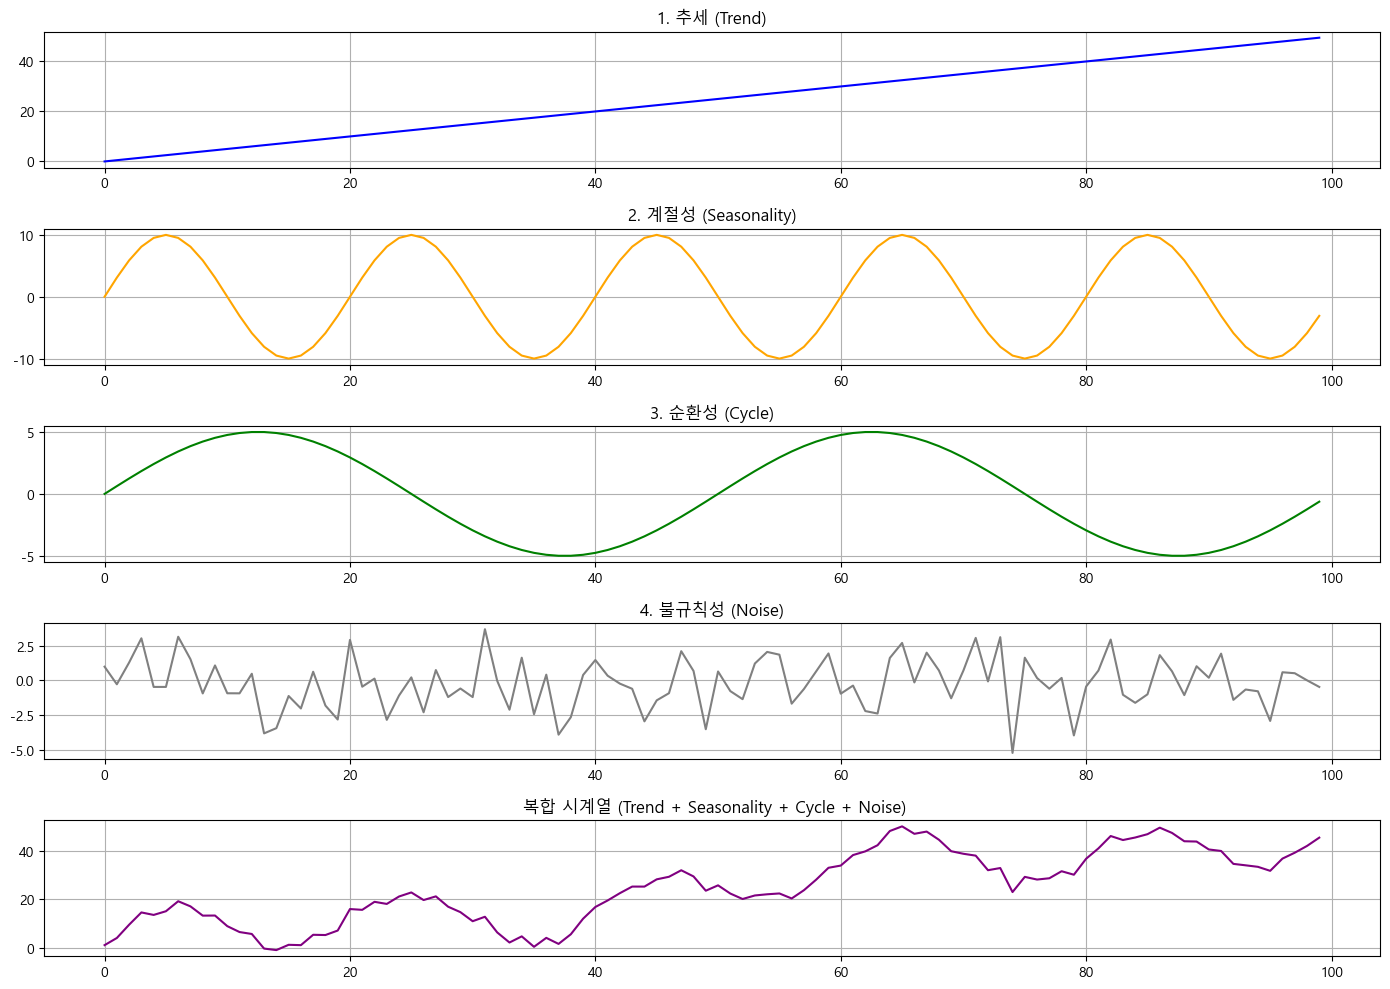

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(42)
t = np.arange(100)

# 1️ 추세 (Trend): 선형 증가
trend = 0.5 * t

# 2️ 계절성 (Seasonality): 주기성 있는 패턴 (sin 파형)
seasonality = 10 * np.sin(2 * np.pi * t / 20)

# 3️ 순환성 (Cycle): 더 긴 주기의 반복 (경제적 사이클 유사)
cycle = 5 * np.sin(2 * np.pi * t / 50)

# 4️ 불규칙성 (Noise): 랜덤 노이즈
noise = np.random.normal(0, 2, size=100)

# 전체 시계열 (복합 예시)
combined = trend + seasonality + cycle + noise

# 시각화
plt.figure(figsize=(14, 10))

plt.subplot(5, 1, 1)
plt.plot(t, trend, label="Trend", color='blue')
plt.title("1. 추세 (Trend)")
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(t, seasonality, label="Seasonality", color='orange')
plt.title("2. 계절성 (Seasonality)")
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(t, cycle, label="Cycle", color='green')
plt.title("3. 순환성 (Cycle)")
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(t, noise, label="Noise", color='gray')
plt.title("4. 불규칙성 (Noise)")
plt.grid(True)

plt.subplot(5, 1, 5)
plt.plot(t, combined, label="Combined", color='purple')
plt.title(" 복합 시계열 (Trend + Seasonality + Cycle + Noise)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# %pip install statsmodels
# %pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

# 📅 1일 단위 날짜 생성
dates = pd.date_range(start="2020-01-01", periods=365, freq="D")
np.random.seed(0)

# 📈 계절성 + 추세 + 노이즈 데이터 생성
t = np.arange(365)
trend = 0.05 * t
seasonality = 10 * np.sin(2 * np.pi * t / 30)
noise = np.random.normal(0, 2, size=365)
data = trend + seasonality + noise

df = pd.DataFrame({"date": dates, "value": data})
df.set_index("date", inplace=True)
df


,value
date,
2020-01-01,3.528105
2020-01-02,2.929431
2020-01-03,6.124842
2020-01-04,10.509639
2020-01-05,11.366564
...,...
2020-12-26,19.396914
2020-12-27,20.136659
2020-12-28,24.031063


## 1️ 시각화 (Line Plot)

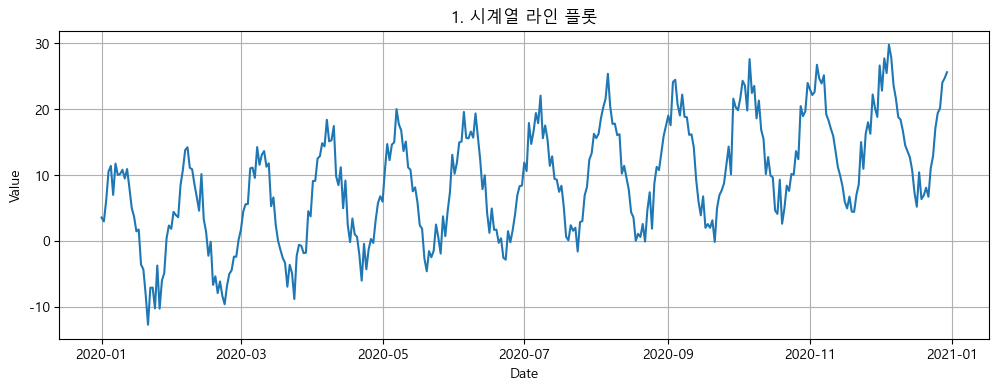

In [4]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['value'])
plt.title("1. 시계열 라인 플롯")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()


## 2️ 추세 파악 (Moving Average)

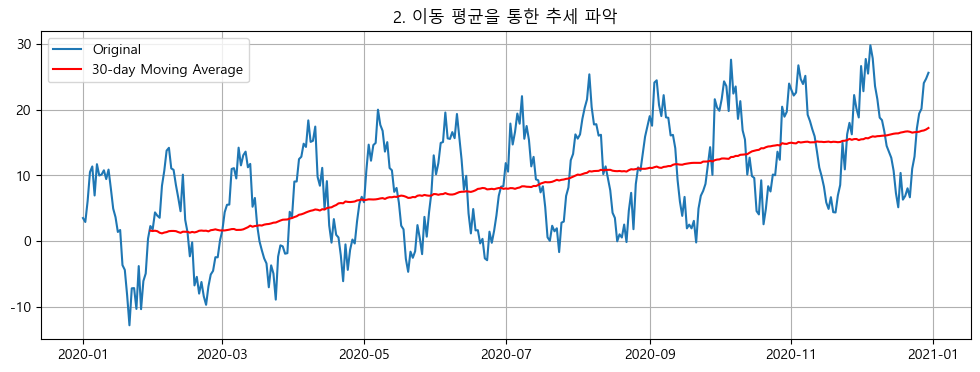

In [5]:
df["MA_30"] = df["value"].rolling(window=30).mean()

plt.figure(figsize=(12, 4))
plt.plot(df["value"], label="Original")
plt.plot(df["MA_30"], label="30-day Moving Average", color='red')
plt.title("2. 이동 평균을 통한 추세 파악")
plt.legend()
plt.grid(True)
plt.show()


| 인사이트 항목           | 설명                                                             |
| ----------------- | -------------------------------------------------------------- |
| **장기 경향 파악**      | 원래 시계열은 노이즈가 많기 때문에, 이동 평균을 통해 **매우 부드러운 추세선**을 얻을 수 있음        |
| **전환점(반전 시점) 탐지** | 이동 평균의 방향이 바뀌는 지점에서 **성장 → 감소** 또는 **감소 → 성장** 등의 추세 변화 가능성 확인 |
| **성장률 둔화 / 가속**   | 이동 평균의 기울기 변화로 성장률이 **점점 빨라지거나 느려짐**을 시각적으로 확인 가능              |
| **계절성 제거용 전처리**   | 짧은 주기의 평균을 취하면 **계절성 패턴을 희석**시켜서 순수한 추세 추정 가능                  |
| **이상치 감쇠 효과**     | 급격한 이상값이 존재하더라도 이동 평균은 이를 **완화된 형태로 보여주어** 전반 흐름 파악에 용이        |


## 3️ 계절성 탐지 (Box Plot: 월별 분포)

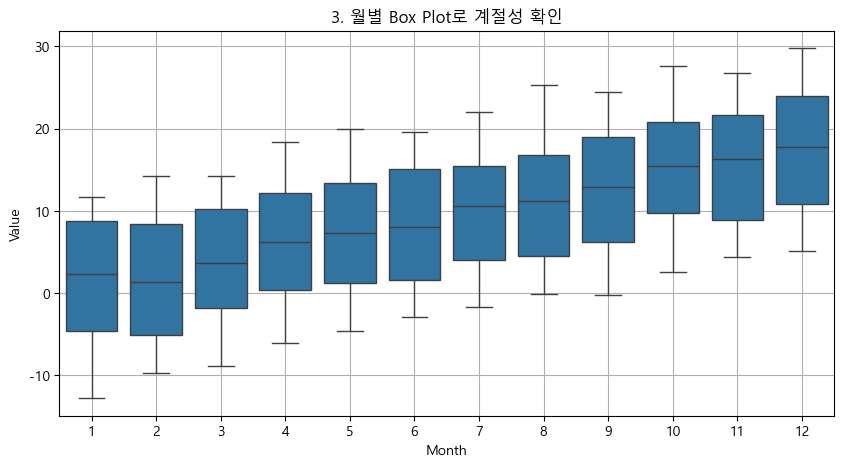

In [6]:
df["month"] = df.index.month

plt.figure(figsize=(10, 5))
sns.boxplot(x="month", y="value", data=df)
plt.title("3. 월별 Box Plot로 계절성 확인")
plt.xlabel("Month")
plt.ylabel("Value")
plt.grid(True)
plt.show()


| 인사이트 항목             | 설명                                                                                   |
| ------------------- | ------------------------------------------------------------------------------------ |
| **계절적 상승/하락**       | 특정 월에 평균값이 눈에 띄게 높거나 낮다면 해당 월에 **수요 증가 또는 감소** 가능성이 있습니다. <br> → 예: 에어컨 매출은 7\~8월 급증 |
| **변동성(Volatility)** | IQR(박스 길이)이 큰 달은 **그 달의 수치 변동이 심함**을 의미 <br> → 예: 날씨, 이벤트 등 외부 요인의 영향 가능성            |
| **이상치 탐지**          | 점으로 나타나는 이상값(Outlier)은 예외적인 이벤트를 의미 <br> → 예: 이상 기후, 공급 중단, 이례적 소비 등                 |
| **비대칭성(Skewness)**  | 박스의 위치와 수염 길이를 보면 데이터가 **한쪽으로 치우쳤는지** 확인 가능                                          |
| **월별 유사성/차이**       | 특정 월끼리 유사한 분포를 가진다면 **같은 계절 그룹으로 묶어 모델에 활용** 가능                                      |


예를 들어 월별 박스플롯을 보면:

- 7~8월: 평균값 높고 변동폭 작음 → 여름철 꾸준한 수요
- 11~1월: 평균 낮고 이상치 다수 → 겨울철 매출 감소 + 일부 특이 상황 존재
- 5월, 10월: 이상치 없이 안정적 → 평이한 수요 패턴


 실제 활용 예

재고 최적화: 수요가 높은 달엔 사전 생산 및 재고 확보

마케팅 전략 수립: 수요 증가 월에 광고 집중

모델링 변수로 활용: 월(Month)을 feature로 포함해 시계열 예측 정확도 향상

week, dayofweek, holiday 단위로 박스 플롯을 확장하여 미세한 주기 분석도 가능

## 4️ 상관성 확인 (ACF, PACF)

시계열 데이터는 이전 시점의 값이 현재에 영향을 미치는 특성이 있다.
이를 수치로 파악하는 것이 ACF와 PACF.

### 1️ ACF (Autocorrelation Function)
과거 시점과 현재 시점 간의 전체적인 상관성을 보는 함수

시차(lag)가 1일 때 → 오늘과 어제의 상관관계

시차가 2일 때 → 오늘과 그저께의 상관관계

중간에 끼어 있는 영향까지 포함된 전체 상관성

 비유:

"오늘(시점 0)이 그저께(시점 2)랑 얼마나 비슷한지"를 물을 때

→ "어제(시점 1)를 거쳐 전달된 영향까지 포함해서 비교"




### 2️ PACF (Partial Autocorrelation Function)

중간 영향을 제거한, 순수한 lag의 직접 상관성

ACF는 중간 경로를 포함하지만
PACF는 딱 그 시점 간의 직접 관계만 측정

즉, 시차 2일의 PACF는 시점 0과 2의 직접 연결만 봄

비유:
"오늘과 그저께 사이에 어제 영향은 제거하고 직접 관계만 보고 싶어"


| 시차(Lag) | ACF 의미                      | PACF 의미             |
| ------- | --------------------------- | ------------------- |
| lag=1   | 어제와 오늘 사이의 전체 상관            | 어제와 오늘 사이의 직접 상관    |
| lag=2   | 어제 경유 → 그저께와 오늘의 전체 상관      | 그저께와 오늘 사이의 직접 상관만  |
| lag=3   | 어제+그저께 경유 → 사흘 전과 오늘의 전체 상관 | 사흘 전과 오늘 사이의 직접 상관만 |


| 목적             | 설명                                      |
| -------------- | --------------------------------------- |
| **모델 차수 결정**   | ACF → MA 모델 차수 추정<br>PACF → AR 모델 차수 추정 |
| **시계열 의존성 파악** | 어떤 과거 시점이 현재에 영향을 주는지 구체적으로 이해          |
| **정상성 검증 보조**  | ACF가 천천히 감소하면 비정상 시계열일 가능성              |

| 용어   | 뜻           | 중간 영향 제거? |
| ---- | ----------- | --------- |
| ACF  | 전체 자기상관     | ❌ 포함함     |
| PACF | 부분(직접) 자기상관 | ✅ 제거함     |



##  ACF, PACF 공식 정리

### 1️ ACF (Autocorrelation Function)

ACF는 시계열 데이터의 lag $k$에 대한 **자기상관계수**를 계산합니다.

$$
\text{ACF}(k) = \frac{\sum_{t=k+1}^{T} (x_t - \bar{x})(x_{t-k} - \bar{x})}{\sum_{t=1}^{T} (x_t - \bar{x})^2}
$$

- $x_t$: 시계열의 $t$번째 값  
- $\bar{x}$: 전체 평균  
- $T$: 전체 시점 수  
- $k$: 시차 (lag)

현재 값 $x_t$와 $x_{t-k}$ 간의 **전체적인 상관관계**

---

###  2️ PACF (Partial Autocorrelation Function)

PACF는 **중간 시차의 영향을 제거한** lag $k$에 대한 순수 상관관계입니다.

$$
\text{PACF}(k) = \text{Corr}(x_t, x_{t-k} \mid x_{t-1}, x_{t-2}, \dots, x_{t-k+1})
$$

- $\text{Corr}(\cdot)$: 조건부 상관계수  
- 중간 시차들을 제거한 후 $x_t$와 $x_{t-k}$ 간의 **직접적 상관성만** 계산

---

###  실무 요약

| 항목 | 정의 방식              | 의미                  | 모델 적용      |
|------|------------------------|-----------------------|----------------|
| ACF  | 전체 평균 기반 자기상관 | 전체 시점 간 상관성 포함 | MA 차수 추정 |
| PACF | 조건부 상관계수        | 직접 상관성만 반영       | AR 차수 추정 |


##  AR 모델을 이용한 ACF 계산 절차 (간단 샘플 데이터)

---

### 1️ 샘플 데이터 생성

예: AR(1) 모델, 계수 φ = 0.6

```python

In [7]:
import numpy as np

# 1️ 샘플 시계열 데이터
data = np.array([4, 5, 6, 5, 4, 3, 4, 5, 6, 5])
n = len(data)

# 2️ 데이터 평균 및 분산
mean = np.mean(data)
var = np.var(data)

# 3️ ACF 계산 함수 (NumPy 활용)
def acf_numpy(x, max_lag):
    n = len(x)
    mean = np.mean(x)
    var = np.var(x)

    acf_values = []
    for lag in range(max_lag + 1):
        # lag만큼 시프트된 두 시퀀스 생성
        x1 = x[lag:]
        x2 = x[:n - lag]
        cov = np.sum((x1 - mean) * (x2 - mean)) / n
        acf = cov / var
        acf_values.append(acf)
    return acf_values

# 4️ lag 0 ~ 5까지 ACF 계산
acf_vals = acf_numpy(data, max_lag=5)

# 5️ 결과 출력
for lag, acf in enumerate(acf_vals):
    print(f"Lag {lag}: ACF = {acf:.3f}")


Lag 0: ACF = 1.000
Lag 1: ACF = 0.409
Lag 2: ACF = -0.380
Lag 3: ACF = -0.675
Lag 4: ACF = -0.279
Lag 5: ACF = 0.191


<img src="image/acf.png">

```text

1️ White Noise (순수 랜덤)
시계열 특징: 무작위로 생성된 값으로 구성, 어떤 규칙성이나 패턴 없음

ACF 해석:
거의 모든 지연(lag)에 대해 상관계수가 0에 가까움
오차 막대(신뢰구간) 안에 대부분 있음 → 자기상관 없음
 정상성(Stationary) 만족하며, 예측 가능성 없음

2️ AR(1) 프로세스 (양의 자기상관)
시계열 특징: 이전 값의 영향을 강하게 받는 자기회귀 구조

ACF 해석:

lag 1에서 높은 자기상관 (약 0.8)

이후 점점 지수적으로 감소 → AR 모델의 전형적인 ACF 패턴

 AR 모델 차수 추정에 유용 (PACF로 보면 lag 1만 유의)

3️ 계절성 있는 시계열 (Seasonal Signal)
시계열 특징: 약 12주기(sin 기반)의 뚜렷한 반복 패턴 존재

ACF 해석:

lag 12, 24, ... 지점에서 강한 상관관계가 나타남

이는 계절성 주기를 반영

 주기성(Seasonality)을 탐지하는 데 유용



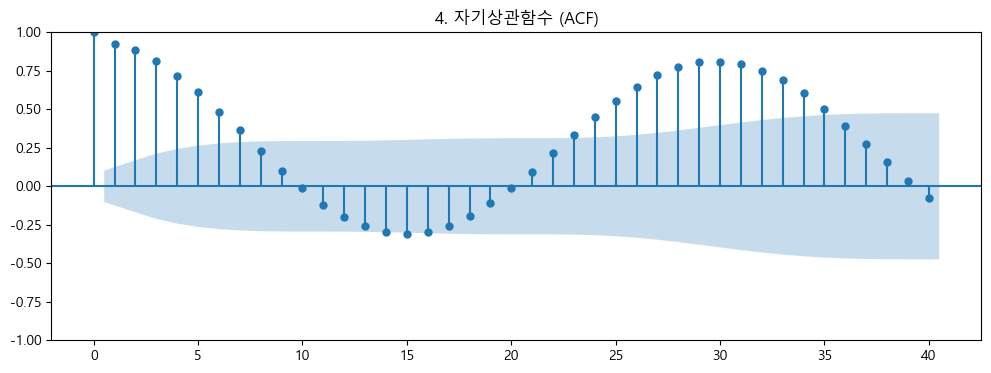

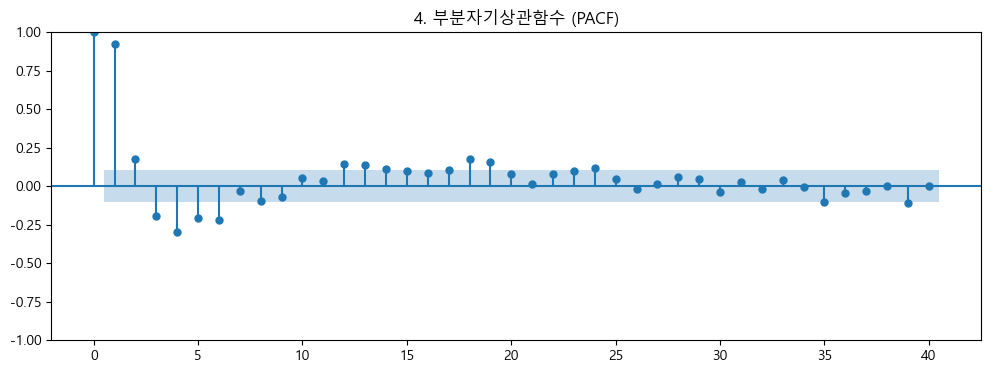

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 4)

plot_acf(df["value"], lags=40)
plt.title("4. 자기상관함수 (ACF)")
plt.show()

plot_pacf(df["value"], lags=40, method="ywm")
plt.title("4. 부분자기상관함수 (PACF)")
plt.show()


5️ 정상성 확인 (ADF Test)

In [9]:
result = adfuller(df["value"])
print("5️ ADF 검정 결과")
print(f"ADF 통계량: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print("=> p-value < 0.05이면 정상성(Stationarity) 있음")


5️ ADF 검정 결과
ADF 통계량: -0.8548
p-value: 0.8025
=> p-value < 0.05이면 정상성(Stationarity) 있음
